# VGG Net 응용
- 참고: https://bskyvision.com/644

In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [4]:
resnet50 = ResNet50()
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [25]:
from tensorflow.keras.applications.resnet import ResNet101
resnet101 = ResNet101()

In [2]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving dog4.jpg to dog4.jpg


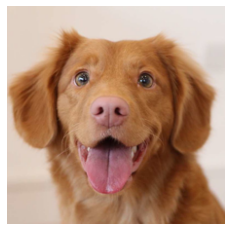

In [6]:
import matplotlib.pyplot as plt

img = Image.open('dog4.jpg').resize((224,224))
plt.imshow(img), plt.axis('off');

- 이미지 예측

In [11]:
yhat = resnet50.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

49152/35363 [=========================================] - 0s 0us/step


((1, 1000),
 [[('n02099267', 'flat-coated_retriever', 0.7748733),
   ('n02104029', 'kuvasz', 0.05762355),
   ('n02099712', 'Labrador_retriever', 0.047069605),
   ('n02099601', 'golden_retriever', 0.039563578),
   ('n02099849', 'Chesapeake_Bay_retriever', 0.017182743)]])

In [12]:
label[0][0][1], label[0][0][2] 

('flat-coated_retriever', 0.7748733)

In [14]:
yhat = resnet50.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2] 

('flat-coated_retriever', 0.7748733)

- 이미지를 224 x 224 사이즈로 자르기

In [15]:
img = Image.open('dog4.jpg')
h, w, _ = np.array(img).shape
h, w

(825, 800)

In [16]:
if h > w:
    width, height = 224, (h * 224) // w
else:
    width, height = (w * 224) // h, 224
height, width

(231, 224)

In [17]:
new_img = np.array(img.resize((width, height)))
new_img.shape

(231, 224, 3)

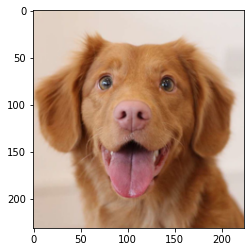

In [18]:
plt.imshow(new_img);

In [19]:
diff = abs(width - height) // 2
if width > height:
    final_img = new_img[:, diff:diff+224, :]
else:
    final_img = new_img[diff:diff+224, :, :]
final_img.shape

(224, 224, 3)

In [20]:
# abs() 참고: https://yongku.tistory.com/1892
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
        width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE
    
    new_img = np.array(img.resize((width, height)))

    diff = abs(width - height) // 2
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE, :, :]

    return final_img

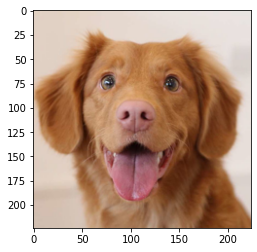

In [22]:
img = Image.open('dog4.jpg')
img2 = center_image(img)
plt.imshow(img2);

In [24]:
yhat = resnet50.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)        # 1000개의 class중, 주어진 사진에서 제일 높은 확률 5개를 출력해서 보여줌
label[0][0][1], label[0][0][2]

('flat-coated_retriever', 0.78584236)

In [26]:
yhat = resnet101.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('flat-coated_retriever', 0.81315166)